In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
columns = pd.read_csv('model/data/PAKDD2010_VariablesList.csv')

columns

,Var_Id,Var_Title,Var_Description,Field_Content,Unnamed: 4,Unnamed: 5
0,1,ID_CLIENT,Sequential number for the applicant (to be use...,"1-50000, 50001-70000, 70001-90000",NaN,NaN
1,2,CLERK_TYPE,Not informed,C,NaN,NaN
2,3,PAYMENT_DAY,"Day of the month for bill payment, chosen by t...","1,5,10,15,20,25",NaN,NaN
3,4,APPLICATION_SUBMISSION_TYPE,Indicates if the application was submitted via...,"Web, Carga",NaN,NaN
4,5,QUANT_ADDITIONAL_CARDS,Quantity of additional cards asked for in the ...,"1,2,NULL",NaN,NaN
5,6,POSTAL_ADDRESS_TYPE,Indicates if the address for posting is the ho...,1.2,NaN,NaN
6,7,SEX,NaN,"M=Male, F=Female",NaN,NaN
7,8,MARITAL_STATUS,Encoding not informed,"1,2,3,4,5,6,7",NaN,NaN
8,9,QUANT_DEPENDANTS,NaN,"0, 1, 2, ...",NaN,NaN
9,10,EDUCATION_LEVEL,Edducational level in gradual order not informed,"1,2,3,4,5",NaN,NaN


In [4]:
# I take columns names and make a list.
col_nam = columns['Var_Title'].to_list()

# I rename some columns.
col_nam[6] = 'GENDER'
col_nam[43] = 'MATE_EDUCATION_LEVEL'
col_nam[53] = 'TARGET'

In [5]:
df = pd.read_csv('model/data/PAKDD2010_Modeling_Data.txt', encoding = 'ISO-8859-1',
 delimiter='\t', header = None, names = col_nam, low_memory = False)

In [6]:
df.head(10)

,ID_CLIENT,CLERK_TYPE,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,GENDER,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL,...,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,FLAG_ACSP_RECORD,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET
0,1,C,5,Web,0,1,F,6,1,0,...,0,0,0,0,1,N,32,595,595,1
1,2,C,15,Carga,0,1,F,2,0,0,...,0,0,0,0,1,N,34,230,230,1
2,3,C,5,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,27,591,591,0
3,4,C,20,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,61,545,545,0
4,5,C,10,Web,0,1,M,2,0,0,...,0,0,0,0,1,N,48,235,235,1
5,6,C,10,0,0,1,M,2,0,0,...,0,0,0,0,2,N,40,371,371,1
6,7,C,15,Carga,0,1,F,2,2,0,...,0,0,0,0,1,N,40,413,413,1
7,8,C,25,Web,0,1,F,1,0,0,...,0,0,0,0,1,N,28,686,686,0
8,9,C,15,0,0,1,F,1,0,0,...,0,0,0,0,2,N,31,172,172,0
9,10,C,5,0,0,1,F,1,0,0,...,0,0,0,0,1,N,41,914,914,0


In [17]:
print('Amount of targets:')
print(df.TARGET.value_counts())


print('\nAmount of targets in percentage:')
print(df.TARGET.value_counts() / df.TARGET.value_counts().sum())

Amount of targets:
0    36959
1    13041
Name: TARGET, dtype: int64

Amount of targets in percentage:
0    0.73918
1    0.26082
Name: TARGET, dtype: float64


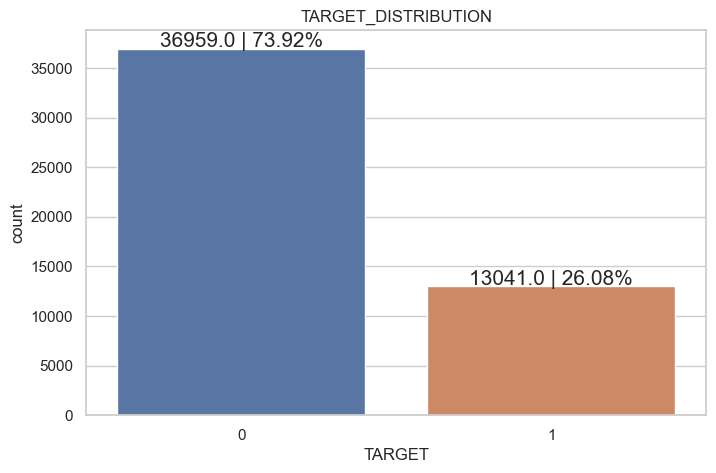

In [20]:
sns.set(style = 'whitegrid')

# Defining the plot size.
plt.figure(figsize = (8, 5))
total = float(len(df['TARGET']))

# Defining the values for x.
plots = sns.countplot(x = 'TARGET', data = df)

# Iterate over the bars one-by-one.
for bar in plots.patches:
    # Pass the coordinates where the annotation shall be done.
    plots.annotate(f'{bar.get_height()} | {round((100 * bar.get_height()/total), 2)}%',(bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha = 'center', va = 'center', size = 15, xytext = (0, 5), textcoords = 'offset points')

plt.title('TARGET_DISTRIBUTION')

plt.show()

In [41]:
# Percentages of  columns with NaN values.
nulls = round(df.isnull().sum().sort_values(ascending = False) / len(df) * 100, 2)

print('Columns with NaNs:')
nulls.head(10)

Columns with NaNs:


PROFESSIONAL_CITY                 67.57
PROFESSIONAL_BOROUGH              67.57
MATE_EDUCATION_LEVEL              64.68
MATE_PROFESSION_CODE              57.77
PROFESSION_CODE                   15.51
OCCUPATION_TYPE                   14.63
MONTHS_IN_RESIDENCE                7.55
RESIDENCE_TYPE                     2.70
PROFESSIONAL_PHONE_AREA_CODE       0.00
QUANT_SPECIAL_BANKING_ACCOUNTS     0.00
dtype: float64

In [40]:
print('Counts of unique values of PROFESSIONAL_CITY:')
df['PROFESSIONAL_CITY'].value_counts() # Same as PROFESSIONAL_BOROUGH column

Counts of unique values of PROFESSIONAL_CITY:


FORTALEZA               419
SAO PAULO               338
                        331
PELOTAS                 324
PORTO ALEGRE            279
                       ... 
SANTIAGO                  1
JUNDIA                    1
SAO JOSE DO  ALEGRE       1
imbe                      1
conselheiro lafaiete      1
Name: PROFESSIONAL_CITY, Length: 2236, dtype: int64

In [42]:
print('Counts of unique values of MATE_EDUCATION_LEVEL:')
df['MATE_EDUCATION_LEVEL'].value_counts()

Counts of unique values of MATE_EDUCATION_LEVEL:


0.0    15995
3.0      621
4.0      615
2.0      342
1.0       56
5.0       33
Name: MATE_EDUCATION_LEVEL, dtype: int64

In [34]:
print('Counts of unique values of MATE_PROFESSION_CODE:')
df['MATE_PROFESSION_CODE'].value_counts()

Counts of unique values of MATE_PROFESSION_CODE:


0.0     13632
11.0     6005
9.0      1035
16.0      208
2.0       110
12.0       34
10.0       31
6.0        16
13.0       15
7.0        11
8.0         7
15.0        3
17.0        3
14.0        2
5.0         1
1.0         1
3.0         1
4.0         1
Name: MATE_PROFESSION_CODE, dtype: int64

In [35]:
print('Counts of unique values of PROFESSION_CODE:')
df['PROFESSION_CODE'].value_counts()

Counts of unique values of PROFESSION_CODE:


9.0     30092
11.0     3545
0.0      3540
2.0      2827
12.0      489
10.0      425
16.0      344
13.0      313
7.0       216
8.0       144
6.0       136
15.0       63
17.0       35
4.0        27
3.0        18
5.0        12
14.0        9
1.0         8
18.0        1
Name: PROFESSION_CODE, dtype: int64

In [36]:
print('Counts of unique values of OCCUPATION_TYPE:')
df['OCCUPATION_TYPE'].value_counts()

Counts of unique values of OCCUPATION_TYPE:


2.0    16947
1.0     8742
4.0     7000
5.0     6891
0.0     2788
3.0      319
Name: OCCUPATION_TYPE, dtype: int64

In [37]:
print('Counts of unique values of MONTHS_IN_RESIDENCE:')
df['MONTHS_IN_RESIDENCE'].value_counts()

Counts of unique values of MONTHS_IN_RESIDENCE:


1.0      7340
0.0      4695
10.0     3799
5.0      3561
2.0      3217
         ... 
71.0        1
90.0        1
82.0        1
100.0       1
89.0        1
Name: MONTHS_IN_RESIDENCE, Length: 88, dtype: int64

In [38]:
print('Counts of unique values of RESIDENCE_TYPE:')
df['RESIDENCE_TYPE'].value_counts()

Counts of unique values of RESIDENCE_TYPE:


1.0    41572
2.0     3884
5.0     1983
0.0      760
4.0      311
3.0      141
Name: RESIDENCE_TYPE, dtype: int64